In [49]:
# import library
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

x1.size() = torch.Size([100, 2])
y1.size() = torch.Size([100])
x2.size() = torch.Size([100, 2])
y2.size() = torch.Size([100])

after cat function:
x.size() = torch.Size([200, 2])
y.size() = torch.Size([200])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])


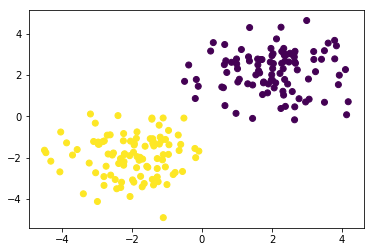

In [51]:
# Make some data to do classification
ndata = torch.ones(100,2)
# torch.normal
# Returns a Tensor of random numbers drawn from separate normal distributions who’s mean and standard deviation are given.

x1 = torch.normal(2*ndata, 1) 
y1 = torch.zeros(100)         
x2 = torch.normal(-2*ndata,1)
y2 = torch.ones(100)

print('x1.size() = {s}'.format(s=x1.size()))
print('y1.size() = {s}'.format(s=y1.size()))
print('x2.size() = {s}'.format(s=x2.size()))
print('y2.size() = {s}'.format(s=y2.size()))

x  = torch.cat((x1,x2),0).type(torch.FloatTensor)
y  = torch.cat((y1,y2),).type(torch.LongTensor)

print('\nafter cat function:')
print('x.size() = {s}'.format(s=x.size()))
print('y.size() = {s}\n'.format(s=y.size()))
print(y)

plt.scatter(x.numpy()[:,0],x.numpy()[:,1],c=y.numpy())
plt.show()

In [52]:
# Define model
class model(nn.Module):
    def __init__(self,x,y):
        super(model,self).__init__()
        self.hidden = nn.Linear(x,10)  # hidden layer(x,10) ,  input_size = x
        self.output = nn.Linear(10,y)  # output Layer(10,y) , output_size = y
        
    def forward(self,x):
        x = F.relu(self.hidden(x))     # activation functio
        #x = torch.max(F.softmax(x),1)
        x = self.output(x)
        return x

In [53]:
# Hyper-parameters
Learning_Rate = 0.01
Epoch_Times = 101
Input_Size = 2
Output_Size = 2

In [54]:
# Build our model
Model = model(Input_Size,Output_Size)
print(Model)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(Model.parameters(),lr=Learning_Rate)

model(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)


epoch 1: accuracy = 0.14


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


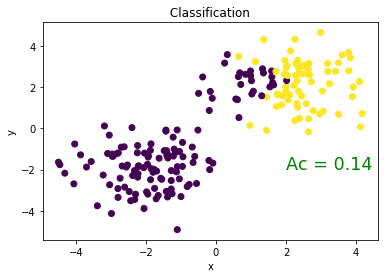

epoch 10: accuracy = 0.275


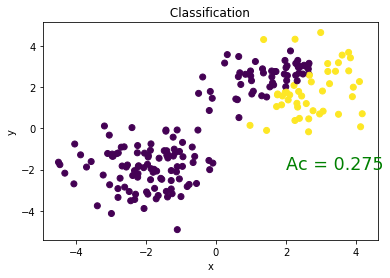

epoch 20: accuracy = 0.45


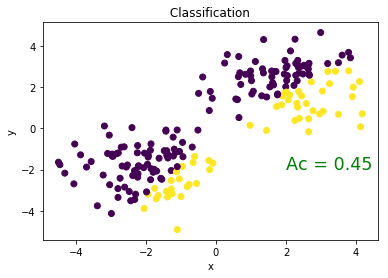

epoch 30: accuracy = 0.765


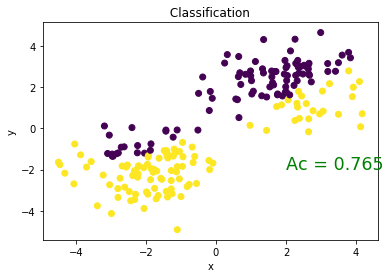

epoch 40: accuracy = 0.915


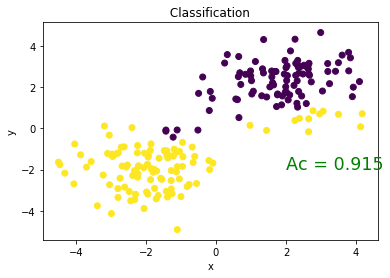

epoch 50: accuracy = 0.945


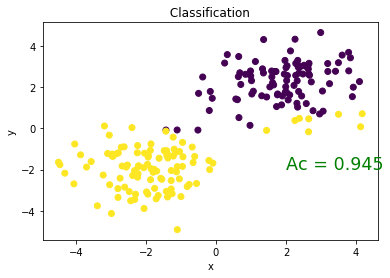

epoch 60: accuracy = 0.975


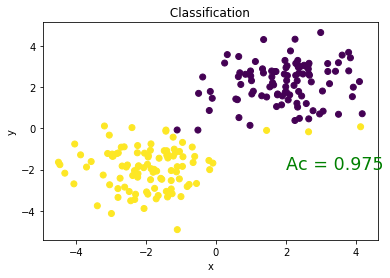

epoch 70: accuracy = 0.985


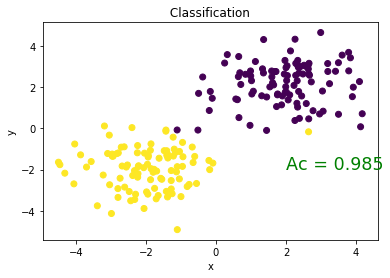

epoch 80: accuracy = 0.995


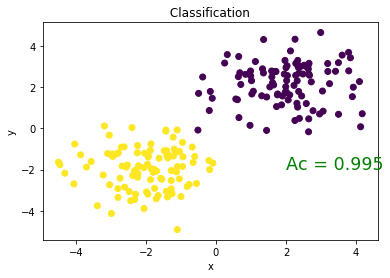

epoch 90: accuracy = 1.0


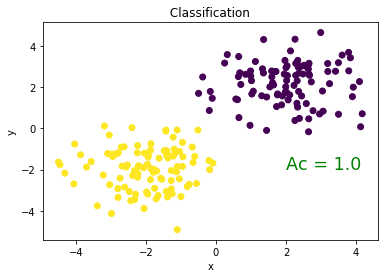

epoch 100: accuracy = 1.0


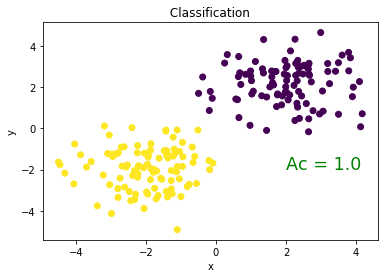

In [55]:
# Training
for i in range(1,Epoch_Times):
    output = Model(x)
    loss = loss_func(output,y) # loss_func(nn's predict output,target)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i==1 or i%10==0:
        
        _, PredictY = torch.max(F.softmax(output),1)
        PredictY = PredictY.data.numpy().squeeze()
        Target_Y = y.numpy()
        
        temp = (PredictY == Target_Y)
        accuracy = (np.sum(temp))/200.0
        
        print('epoch {e}: accuracy = {ac}'.format(e=i,ac=accuracy))
        plt.title(' Classification ')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.scatter(x.numpy()[:,0],x.numpy()[:,1],c=PredictY+1)
        plt.text(2,-2,'Ac = {a}'.format(a=accuracy),fontdict={'size':17.5, 'color':'green'})
        plt.show()